In [163]:
Juar,Kuar=16,16
putinsky=randn(Juar,Kuar)
map!(x->floor(x), putinsky)
putete=map(x->convert(Int16, x), putinsky)

16x16 Array{Int16,2}:
  0   2   0  -1   0  -1   0   1   0  -3   1  -1   2   1  -1   1
 -1   2  -2   0  -1  -2  -1  -1   1  -1  -1   0   1  -1  -1   0
 -1  -1   0   0  -1  -1  -1   1  -1   0  -1  -1  -1   0   0   0
 -1   1   0   1   0  -1   0  -1  -2  -1  -2  -2   1   0  -1   0
  1  -1  -2  -1   0   0  -3   0  -1   1  -2  -1  -1   0  -2   0
  0   0  -1   0   0   0   0   0   0   0  -1  -1  -2  -1   0   0
  0  -1  -1  -2  -1   0  -2   1  -1   0   0   0   0  -1   0   1
 -1   0  -3   1   0  -1  -1  -2   2  -1  -2  -2  -1   1   2  -1
 -2  -1  -1  -1   1  -1  -1  -2   0  -1   0   0  -2   0   1  -1
 -1  -2   0   1  -2  -1   1   1   0   0  -2   1  -2  -1   1  -3
  1   0   0   0  -1   1  -2  -2  -2  -1   0  -1  -3   1   0  -1
  0   0  -1  -1   1  -2   0   0  -1   0   1   0   1  -2   0   0
 -1   0  -1  -2  -2  -2   0  -1   0  -1   0  -1   0  -2   0  -3
  1  -3  -1  -1  -1  -1  -2  -1  -2   0   1  -2  -1   0  -1  -1
  0  -1  -1  -1  -1  -2  -2  -2  -3   0  -2  -1   0   1  -2   1
 -1   2   1  -2   

In [160]:
using PyPlot

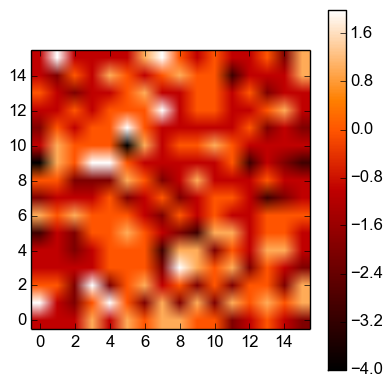

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f5a3efc4368>

In [161]:
figure(figsize=(4.5,4.5))
imagen=imshow(putete, cmap="gist_heat", origin="lower")
colorbar(imagen)

In [5]:
using Graphs

In [200]:
ActividadNegativa=Array{Int64}[]
#ActividadPositiva=Graph()
#SpikeCountPositivo=zeros(64,64);
SpikeCountNegativo=zeros(Juar,Kuar);
SpikeCountTotal=zeros(Juar,Kuar;)
for j=1:Juar, k=1:Kuar          
    if(putete[j,k]<-0.0)      
        push!(ActividadNegativa, [j, k])
        SpikeCountNegativo[j,k]+=1
    #elseif(putete[j,k]>0.0) 
    #    ActividadPositiva=vcat(ActividadPositiva, [j, k])
    #    SpikeCountPositivo[j,k]+=1
    end
end

In [206]:
#Simple pass method
lista=ActividadNegativa
curlab=0
componentes=Set{Any}()
while(length(lista)!=0)
    x=shift!(lista) #arranca el PRIMER elemento de la lista
    listaprofundeza=Array{Int64}[]
    componentecurlab=Array{Int64}[]
    push!(listaprofundeza, x) #Pone elementos al FINAL de la lista
    push!(componentecurlab, x)
    profundidad=0
    while ((length(listaprofundeza)!=0) && profundidad<2)
        x=shift!(listaprofundeza)
       
            for v in vecindad8(x)
                if in(v, lista)
                    deleteat!(lista, findin(lista, v))
                    push!(listaprofundeza, v)
                    profundidad+=1
                    push!(componentecurlab, v)
                end
            end
    end
    curlab+=1
    push!(componentes, componentecurlab)
end
curlab

133

In [207]:
listprofundeza

1613-element Array{Array{Int64,N},1}:
 [64,64]
 [64,62]
 [1,1]  
 [1,4]  
 [1,7]  
 [1,8]  
 [1,9]  
 [1,10] 
 [1,11] 
 [1,13] 
 [1,17] 
 [1,21] 
 [1,22] 
 ⋮      
 [8,7]  
 [8,8]  
 [8,10] 
 [8,11] 
 [8,12] 
 [8,13] 
 [8,16] 
 [9,1]  
 [9,2]  
 [9,3]  
 [9,4]  
 [9,6]  

In [195]:
centrosdemasa=[[0 0 0];]
for p in componentes
    masa=0.00
    x=0.00
    y=0.00
    for q in p
        j=q[1]
        k=q[2]
        masa+=putete[j,k]
        x+=k*masa
        y+=j*masa
    end
    x/=masa
    y/=masa
    A=[x y masa]
    centrosdemasa=vcat(centrosdemasa, A)
end

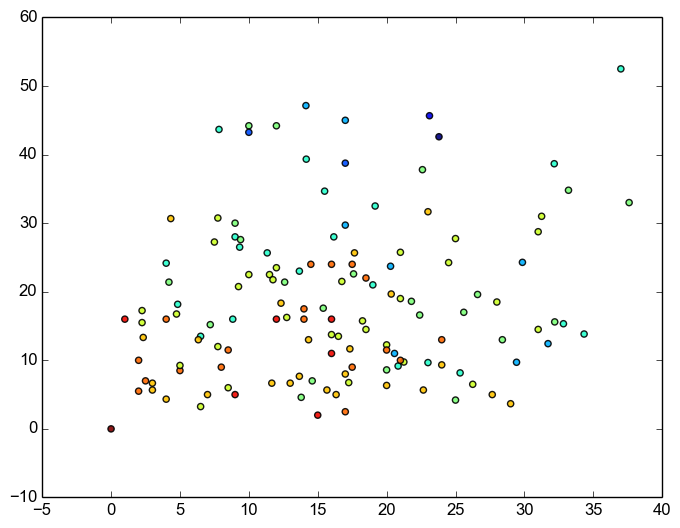

PyObject <matplotlib.collections.PathCollection object at 0x7f5a15c92f90>

In [196]:
scatter(centrosdemasa[:,1], centrosdemasa[:,2], c=centrosdemasa[:,3], alpha=0.9)

In [183]:
length(componentes)

135

In [29]:
function vecindad8(punto::Array)
    j=punto[1]
    k=punto[2]
    result=Set{Array{Int64,1}}()
    push!(result, [j-1,k-1])
    push!(result, [j-1,k])
    push!(result, [j-1,k+1])
    push!(result, [j,k-1])
    push!(result, [j,k+1])
    push!(result, [j+1,k-1])
    push!(result, [j+1,k])
    push!(result, [j+1,k+1])
    return result
end
    

vecindad8 (generic function with 1 method)

In [9]:
ActividadNegativa.vertices[2]==[1, 4]

true

In [10]:
in([1, 4], ActividadNegativa.vertices)

true

In [11]:
conter=0
for a in ActividadNegativa.vertices
    for v in vecindad8(a)
        if ( in(v, ActividadNegativa.vertices)) 
            conter+=1
            lado=ExEdge(conter, a, v)
            push!(ActividadNegativa.edges, lado)
        end
    end
end
conter

8016

In [12]:
ActividadNegativa.edges

8016-element Array{ExEdge{V},1}:
 edge [1]: [1,1] -- [2,2]       
 edge [2]: [1,4] -- [2,5]       
 edge [3]: [1,4] -- [2,4]       
 edge [4]: [1,4] -- [2,3]       
 edge [5]: [1,7] -- [2,6]       
 edge [6]: [1,7] -- [1,8]       
 edge [7]: [1,7] -- [2,8]       
 edge [8]: [1,7] -- [2,7]       
 edge [9]: [1,8] -- [2,7]       
 edge [10]: [1,8] -- [2,8]      
 edge [11]: [1,8] -- [1,9]      
 edge [12]: [1,8] -- [1,7]      
 edge [13]: [1,9] -- [1,8]      
 ⋮                              
 edge [8005]: [64,55] -- [64,56]
 edge [8006]: [64,56] -- [64,57]
 edge [8007]: [64,56] -- [63,56]
 edge [8008]: [64,56] -- [64,55]
 edge [8009]: [64,57] -- [63,56]
 edge [8010]: [64,57] -- [64,56]
 edge [8011]: [64,60] -- [63,61]
 edge [8012]: [64,60] -- [63,59]
 edge [8013]: [64,60] -- [63,60]
 edge [8014]: [64,62] -- [63,61]
 edge [8015]: [64,62] -- [63,62]
 edge [8016]: [64,64] -- [63,64]

In [21]:
adjacency_matrix(ActividadNegativa)

LoadError: `source` has no method matching source(::ExEdge{Array{Int64,1}}, ::GenericGraph{Array{T,1},ExEdge{V},Array{Array{T,1},1},Array{ExEdge{V},1},Array{Array{ExEdge{V},1},1}})
while loading In[21], in expression starting on line 1

In [5]:
add_edge!(gr, 2,3)
add_edge!(gr, 1,3)
add_edge!(gr, 5,3)
add_edge!(gr, 4,1)


edge [4]: 4 -- 1

In [8]:
plot(gr)

Failed to open XLIB display: 


In [18]:
?Graphs

Symbol not found. Falling back on apropos search ...
No help information found.


In [20]:
Pkg.installed("Graphs")

v"0.5.2"